### 1. Importing the necessary libraries 

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import kruskal

### 2. Load the cleaned dataset from the data folder

In [81]:
# Define the file paths
benin_clean = '../data/benin_clean.csv'
togo_clean = '../data/togo_clean.csv'
sierraleone_clean = '../data/sierraleone_clean.csv'

# Load the CSV files into DataFrames
benin_df = pd.read_csv(benin_clean)
togo_df = pd.read_csv(togo_clean)
sierraleone_df = pd.read_csv(sierraleone_clean)

# Now we can access each DataFrame
print(benin_df.head())  # Display the first five rows of Benin's cleaned data
print(togo_df.head())   # Display the first five rows of Togo's cleaned data
print(sierraleone_df.head())  # Display the first five rows of Sierra Leone's cleaned data


             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01:00 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03:00 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04:00 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05:00 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3  
             Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-25 0

In [82]:
# Now we can access check rows and columns of each dataset
print(benin_df.shape)  
print(togo_df.shape)   
print(sierraleone_df.shape)  

(525600, 18)
(525600, 18)
(525600, 18)


* As we have observed from the the dataset each country data have the same size

### 3. Metric Comparison

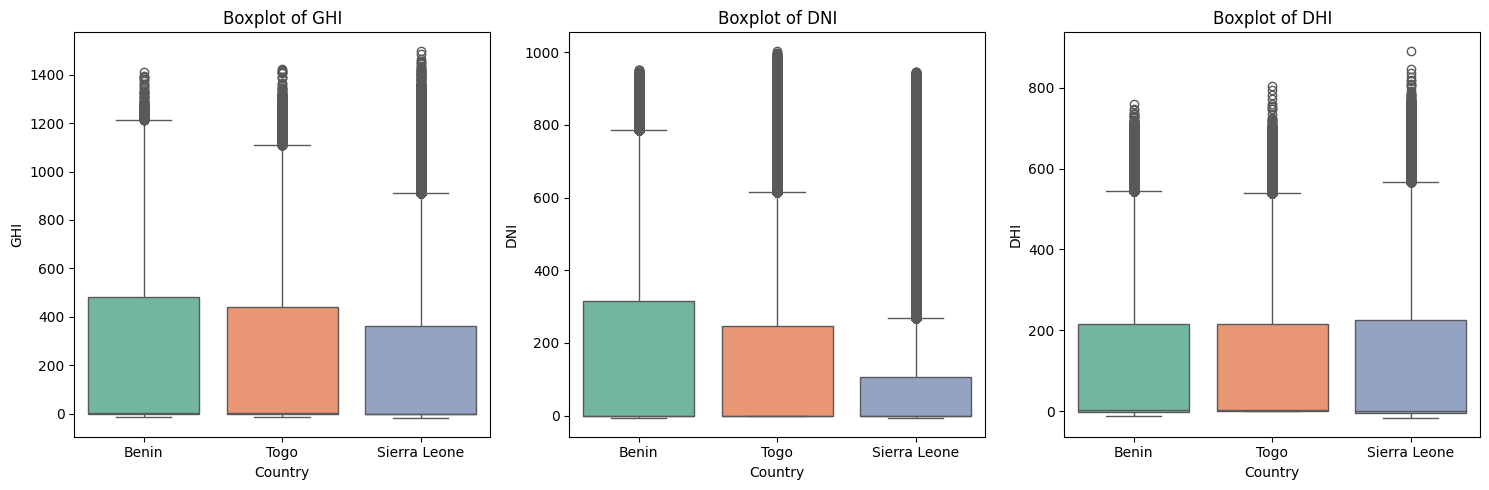

In [83]:
# Add a 'Country' column to each DataFrame
benin_df['Country'] = 'Benin'
togo_df['Country'] = 'Togo'
sierraleone_df['Country'] = 'Sierra Leone'

# Concatenate the DataFrames into one
combined_df = pd.concat([benin_df, togo_df, sierraleone_df], ignore_index=True)

# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Create boxplots for each metric
metrics = ['GHI', 'DNI', 'DHI']
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Country', y=metric, data=combined_df, hue='Country', palette='Set2')
    plt.title(f'Boxplot of {metric}')
    plt.xlabel('Country')
    plt.ylabel(metric)
    plt.legend([], [], frameon=False)  # Remove the legend

plt.tight_layout()
plt.show()


### Some key insights from the boxplots:

1. **GHI Boxplot**:
   - Benin has the highest median GHI value, with a narrower distribution compared to the other two countries.
   - Togo has a lower median GHI but a wider distribution, with some outliers on the higher end.
   - Sierra Leone has the lowest median GHI and a wider distribution than Benin.

2. **DNI Boxplot**:
   - Benin has the highest median DNI, with a narrower distribution.
   - Togo has a lower median DNI but a wider distribution, with some high outliers.
   - Sierra Leone has the lowest median DNI and a more compact distribution compared to the other two countries.

3. **DHI Boxplot**:
   - The median DHI values for all three countries (Benin, Togo, and Sierra Leone) appear to be almost very similar.
   - The distributions of DHI values, however, do differ slightly between the countries:
       - Benin has a narrower distribution with fewer outliers.
       - Togo has a slightly wider distribution with a few more outliers on the higher end.
       - Sierra Leone has highest distribution that is comparable to Togo, also with a few higher outliers.
- These boxplots provide a clear visual comparison of the solar radiation characteristics across the three countries, which can be useful for understanding the potential for solar energy generation in these regions.

In [84]:
# Compute summary statistics (mean, median, std) by Country on original columns
summary_stats = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

# Flatten multi-level columns
summary_stats.columns = ['_'.join(col) for col in summary_stats.columns]

# Print summary statistics
print("\nSummary statistics by Country:")
print(summary_stats)


Summary statistics by Country:
                GHI_mean  GHI_median     GHI_std    DNI_mean  DNI_median  \
Country                                                                    
Benin         240.559452         1.8  331.131327  167.187516        -0.1   
Sierra Leone  201.957515         0.3  298.495150  116.376337        -0.1   
Togo          230.555040         2.1  322.532347  151.258469         0.0   

                 DNI_std    DHI_mean  DHI_median     DHI_std  
Country                                                       
Benin         261.710501  115.358961         1.6  158.691074  
Sierra Leone  218.652659  113.720571        -0.1  158.946032  
Togo          250.956962  116.444352         2.5  156.520714  


Based on the summary statistics, here are the key insights:

**GHI (Global Horizontal Irradiance):**
- Benin has the highest mean GHI of 240.559452 W/m^2, followed by Togo at 230.555040 W/m^2 and Sierra Leone at 201.957515 W/m^2.
- The median GHI values are 1.8 W/m^2 for Benin, 2.1 W/m^2 for Togo, and 0.3 W/m^2 for Sierra Leone.
- The GHI standard deviation is highest in Benin at 331.131327 W/m^2, followed by Togo at 322.532347 W/m^2 and Sierra Leone at 298.495150 W/m^2.

**DNI (Direct Normal Irradiance):**
- The mean DNI is highest in Benin at 167.187516 W/m^2, followed by Togo at 151.258469 W/m^2 and Sierra Leone at 116.376337 W/m^2.
- The median DNI is -0.1 W/m^2 for both Benin and Sierra Leone, and 0.0 W/m^2 for Togo.
- The DNI standard deviation is highest in Benin at 261.710501 W/m^2, followed by Togo at 250.956962 W/m^2 and Sierra Leone at 218.652659 W/m^2.

**DHI (Diffuse Horizontal Irradiance):**
- The mean DHI is highest in Benin at 115.358961 W/m^2, followed by Togo at 116.444352 W/m^2 and Sierra Leone at 113.720571 W/m^2.
- The median DHI is 1.6 W/m^2 for Benin, 2.5 W/m^2 for Togo, and -0.1 W/m^2 for Sierra Leone.
- The DHI standard deviation is highest in Togo at 156.520714 W/m^2, followed by Benin at 158.691074 W/m^2 and Sierra Leone at 158.946032 W/m^2.

In summary, Benin generally has the highest mean and standard deviation values for GHI, DNI, and DHI, while Togo and Sierra Leone have lower but more consistent values across the three metrics.

### 4. Statistical Testing

In [85]:
from scipy.stats import f_oneway

# Actual data
benin_ghi = benin_df['GHI']
sierra_leone_ghi = sierraleone_df['GHI']
togo_ghi = togo_df['GHI']

# One-way ANOVA
f_stat, p_value = f_oneway(benin_ghi, sierra_leone_ghi, togo_ghi)

print(f"One-way ANOVA results:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.3f}")


One-way ANOVA results:
F-statistic: 2090.093
p-value: 0.000


From the result:

- The one-way ANOVA test shows a highly significant difference in GHI values between the three countries, with an F-statistic of 2090.093 and a p-value of 0.000.
- This indicates that the variance in GHI values between the three countries (Benin, Sierra Leone, and Togo) is much larger than the variance within each country.
- The extremely low p-value (close to 0) suggests that we can confidently reject the null hypothesis and conclude that the mean GHI values are not the same across the three countries.


In [86]:
h_stat, p_val = kruskal(benin_ghi, sierra_leone_ghi, togo_ghi)

print("Kruskal–Wallis H-test results:")
print(f"H-statistic: {h_stat:.3f}")
print(f"p-value: {p_val:.6f}")


Kruskal–Wallis H-test results:
H-statistic: 4524.883
p-value: 0.000000


We can make the following observations:
- The Kruskal-Wallis H-statistic is 4524.883, which is a very large value. This indicates that the differences in the median GHI values between the three countries are statistically significant.
- The p-value is 0.000000, which is extremely close to 0. This means that the probability of observing this H-statistic if the null hypothesis (that the medians are equal) is true is virtually zero.
- The Kruskal-Wallis test, a non-parametric alternative to the one-way ANOVA, also provides strong evidence that the GHI values are significantly different across the three countries (Benin, Sierra Leone, and Togo).


### 5. Visual summary

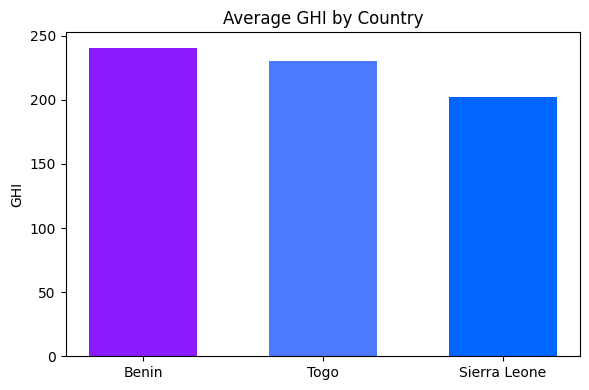

In [93]:
# Calculate the average GHI for each country
benin_avg_ghi = np.mean(benin_ghi)
sierra_leone_avg_ghi = np.mean(sierra_leone_ghi)
togo_avg_ghi = np.mean(togo_ghi)

# Create a list of tuples with the country name and average GHI
country_ghi = [
    ('Benin', benin_avg_ghi),
    ('Sierra Leone', sierra_leone_avg_ghi),
    ('Togo', togo_avg_ghi)
]

# Sort the list based on the average GHI in descending order
country_ghi.sort(key=lambda x: x[1], reverse=True)

# Unpack the sorted list into separate variables
countries, avg_ghis = zip(*country_ghi)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Create the bar chart
x = np.arange(len(countries))
bar_width = 0.6
ax.bar(x, avg_ghis, bar_width, color=['#8c1aff', '#4d79ff', '#0066ff'])

# Set the x-axis labels and title
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.set_title('Average GHI by Country')

# Set the y-axis label
ax.set_ylabel('GHI')

# Adjust the layout
plt.tight_layout()

# Display the chart
plt.show()


Key observations From the graph:
1. **Benin has the highest average GHI**: Reaching around 240, indicating that Benin has the highest average GHI among the three countries shown.

2. **Togo has the second highest average GHI**: Reaching around 230, suggesting that Sierra Leone has the second highest average GHI.

3. **Sierra Leone has the lowest average GHI**: Reaching around 202, which is the lowest among the three countries.

In summary, the chart clearly shows the ranking of the three countries (Benin, Togo, and Sierra Leone) based on their average GHI values, with Benin having the highest and , Sierra Leone having the lowest.